# Personal Finance Dataset Analysis
## Comprehensive Data Analysis by Senior Data Analyst

**Analysis Overview:**
This notebook provides a thorough analysis of a synthetic personal finance dataset containing 32,426 records with detailed information about user demographics, financial status, loan patterns, and regional distribution. As a data analyst with 5 years of experience, I'll explore key financial patterns, identify trends, and derive actionable insights for strategic decision-making.

**Dataset Features:**
- User demographics (age, gender, education, employment)
- Financial metrics (income, expenses, savings, credit scores)
- Loan information (types, amounts, terms, EMI)
- Geographic distribution
- Temporal data (record dates)

**Analysis Goals:**
1. Understand demographic and financial distributions
2. Identify key patterns in income, expenses, and savings
3. Analyze loan behaviors and credit relationships
4. Compare regional financial trends
5. Provide data-driven insights for financial planning

## 1. Import Required Libraries and Load Data

We'll start by importing essential libraries for data analysis, visualization, and statistical computations.

In [1]:
# Import essential libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Libraries imported successfully!
Analysis Date: 2025-08-08 21:09:51


In [2]:
# Load the dataset
file_path = 'synthetic_personal_finance_dataset.csv'
df = pd.read_csv(file_path)

print("✅ Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Total records: {df.shape[0]:,}")
print(f"Total features: {df.shape[1]:,}")

# Display first few rows
print("\n" + "="*80)
print("FIRST 5 ROWS OF THE DATASET")
print("="*80)
display(df.head())

✅ Dataset loaded successfully!
Dataset shape: (32424, 20)
Total records: 32,424
Total features: 20

FIRST 5 ROWS OF THE DATASET


,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,loan_type,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date
0,U00001,56,Female,High School,Self-employed,Salesperson,3531.69,1182.59,367655.03,No,NaN,0.00,0,0.00,0.00,0.00,430,8.68,Other,2024-01-09
1,U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,Education,146323.34,36,4953.50,13.33,1.40,543,6.16,North America,2022-02-13
2,U00003,20,Female,Master,Employed,Teacher,2799.49,1003.91,230921.21,No,NaN,0.00,0,0.00,0.00,0.00,754,6.87,Africa,2022-05-12
3,U00004,25,Male,PhD,Employed,Manager,5894.88,4440.12,304815.51,Yes,Business,93242.37,24,4926.57,23.93,0.84,461,4.31,Europe,2023-10-02
4,U00005,53,Female,PhD,Employed,Student,5128.93,4137.61,461509.48,No,NaN,0.00,0,0.00,0.00,0.00,516,7.50,Africa,2021-08-07


## 2. Data Overview and Basic Information

Let's examine the structure, data types, and basic statistics of our dataset to understand what we're working with.

In [3]:
# Dataset Information
print("DATASET INFORMATION")
print("="*50)
print(f"Columns: {list(df.columns)}")
print(f"\nData Types:")
print(df.dtypes)

print("\n" + "="*50)
print("MISSING VALUES ANALYSIS")
print("="*50)
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

print(missing_info[missing_info['Missing Count'] > 0])
if missing_info['Missing Count'].sum() == 0:
    print("✅ No missing values found in the dataset!")

print("\n" + "="*50)
print("BASIC DATASET STATISTICS")
print("="*50)
display(df.describe())

DATASET INFORMATION
Columns: ['user_id', 'age', 'gender', 'education_level', 'employment_status', 'job_title', 'monthly_income_usd', 'monthly_expenses_usd', 'savings_usd', 'has_loan', 'loan_type', 'loan_amount_usd', 'loan_term_months', 'monthly_emi_usd', 'loan_interest_rate_pct', 'debt_to_income_ratio', 'credit_score', 'savings_to_income_ratio', 'region', 'record_date']

Data Types:
user_id                     object
age                          int64
gender                      object
education_level             object
employment_status           object
job_title                   object
monthly_income_usd         float64
monthly_expenses_usd       float64
savings_usd                float64
has_loan                    object
loan_type                   object
loan_amount_usd            float64
loan_term_months             int64
monthly_emi_usd            float64
loan_interest_rate_pct     float64
debt_to_income_ratio       float64
credit_score                 int64
savings_to_income_r

,age,monthly_income_usd,monthly_expenses_usd,savings_usd,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio
count,32424.000000,32424.000000,32424.000000,3.242400e+04,32424.000000,32424.000000,32424.000000,32424.000000,32424.000000,32424.000000,32424.000000
mean,43.415865,4027.863185,2419.444709,2.437520e+05,100114.735992,58.500000,3092.992339,6.616332,1.194881,575.260424,5.045431
std,14.978246,1916.773353,1388.893084,1.915772e+05,152536.588635,104.865373,6478.939776,9.472964,3.761964,159.023227,2.851344
min,18.000000,500.000000,150.010000,6.359600e+02,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.100000
25%,30.000000,2657.795000,1397.497500,8.629155e+04,0.000000,0.000000,0.000000,0.000000,0.000000,437.000000,2.580000
50%,43.000000,3997.740000,2219.575000,2.017003e+05,0.000000,0.000000,0.000000,0.000000,0.000000,575.000000,5.040000
75%,56.000000,5351.607500,3254.037500,3.589662e+05,189499.070000,60.000000,3574.567500,13.140000,0.920000,714.000000,7.510000
max,69.000000,12404.050000,10082.710000,1.237774e+06,499954.750000,360.000000,47723.840000,30.000000,90.670000,850.000000,10.000000


In [4]:
# Categorical Data Overview
print("CATEGORICAL VARIABLES ANALYSIS")
print("="*50)

categorical_columns = ['gender', 'education_level', 'employment_status', 'job_title', 
                      'has_loan', 'loan_type', 'region']

for col in categorical_columns:
    if col in df.columns:
        print(f"\n{col.upper()}:")
        value_counts = df[col].value_counts()
        print(value_counts.head(10))  # Show top 10 values
        print(f"Unique values: {df[col].nunique()}")

# Check data ranges for key numerical columns
print("\n" + "="*50)
print("KEY NUMERICAL RANGES")
print("="*50)
numerical_cols = ['age', 'monthly_income_usd', 'monthly_expenses_usd', 'savings_usd', 
                 'credit_score', 'debt_to_income_ratio', 'savings_to_income_ratio']

for col in numerical_cols:
    if col in df.columns:
        print(f"{col}: ${df[col].min():,.2f} - ${df[col].max():,.2f}" if 'usd' in col 
              else f"{col}: {df[col].min():.2f} - {df[col].max():.2f}")

CATEGORICAL VARIABLES ANALYSIS

GENDER:
gender
Male      15595
Female    15550
Other      1279
Name: count, dtype: int64
Unique values: 3

EDUCATION_LEVEL:
education_level
Bachelor       13038
Master          9673
High School     6456
PhD             1638
Other           1619
Name: count, dtype: int64
Unique values: 5

EMPLOYMENT_STATUS:
employment_status
Employed         19410
Self-employed     6580
Unemployed        3220
Student           3214
Name: count, dtype: int64
Unique values: 4

JOB_TITLE:
job_title
Driver         3698
Teacher        3674
Manager        3621
Student        3609
Unemployed     3606
Accountant     3591
Salesperson    3567
Doctor         3554
Engineer       3504
Name: count, dtype: int64
Unique values: 9

HAS_LOAN:
has_loan
No     19429
Yes    12995
Name: count, dtype: int64
Unique values: 2

LOAN_TYPE:
loan_type
Home         3284
Education    3275
Business     3261
Car          3175
Name: count, dtype: int64
Unique values: 4

REGION:
region
North America    658

## 3. Data Cleaning and Preprocessing

Now we'll clean the data, handle any inconsistencies, and create derived variables for deeper analysis.

In [5]:
# Create a copy for processing
df_clean = df.copy()

# Convert record_date to datetime
df_clean['record_date'] = pd.to_datetime(df_clean['record_date'])

# Create age groups for better analysis
def categorize_age(age):
    if age < 25:
        return '18-24'
    elif age < 35:
        return '25-34'
    elif age < 45:
        return '35-44'
    elif age < 55:
        return '45-54'
    elif age < 65:
        return '55-64'
    else:
        return '65+'

df_clean['age_group'] = df_clean['age'].apply(categorize_age)

# Create income brackets
def categorize_income(income):
    if income < 2000:
        return 'Low (<$2K)'
    elif income < 4000:
        return 'Medium ($2K-$4K)'
    elif income < 6000:
        return 'High ($4K-$6K)'
    else:
        return 'Very High (>$6K)'

df_clean['income_bracket'] = df_clean['monthly_income_usd'].apply(categorize_income)

# Create savings rate categories
def categorize_savings_rate(rate):
    if rate < 2:
        return 'Low (<2x income)'
    elif rate < 5:
        return 'Medium (2-5x income)'
    elif rate < 8:
        return 'High (5-8x income)'
    else:
        return 'Very High (>8x income)'

df_clean['savings_category'] = df_clean['savings_to_income_ratio'].apply(categorize_savings_rate)

# Create expense ratio (expenses as % of income)
df_clean['expense_ratio'] = (df_clean['monthly_expenses_usd'] / df_clean['monthly_income_usd']) * 100

# Create loan status binary
df_clean['has_loan_binary'] = df_clean['has_loan'].map({'Yes': 1, 'No': 0})

print("✅ Data cleaning completed!")
print(f"New columns created: {['age_group', 'income_bracket', 'savings_category', 'expense_ratio', 'has_loan_binary']}")
print(f"Cleaned dataset shape: {df_clean.shape}")

# Display sample of cleaned data
display(df_clean[['age', 'age_group', 'monthly_income_usd', 'income_bracket', 
                  'savings_to_income_ratio', 'savings_category', 'expense_ratio']].head())

✅ Data cleaning completed!
New columns created: ['age_group', 'income_bracket', 'savings_category', 'expense_ratio', 'has_loan_binary']
Cleaned dataset shape: (32424, 25)


,age,age_group,monthly_income_usd,income_bracket,savings_to_income_ratio,savings_category,expense_ratio
0,56,55-64,3531.69,Medium ($2K-$4K),8.68,Very High (>8x income),33.485102
1,19,18-24,3531.73,Medium ($2K-$4K),6.16,High (5-8x income),67.049010
2,20,18-24,2799.49,Medium ($2K-$4K),6.87,High (5-8x income),35.860460
3,25,25-34,5894.88,High ($4K-$6K),4.31,Medium (2-5x income),75.321635
4,53,45-54,5128.93,High ($4K-$6K),7.50,High (5-8x income),80.671992


## 4. Exploratory Data Analysis - Demographics

Let's explore the demographic composition of our dataset through comprehensive visualizations.

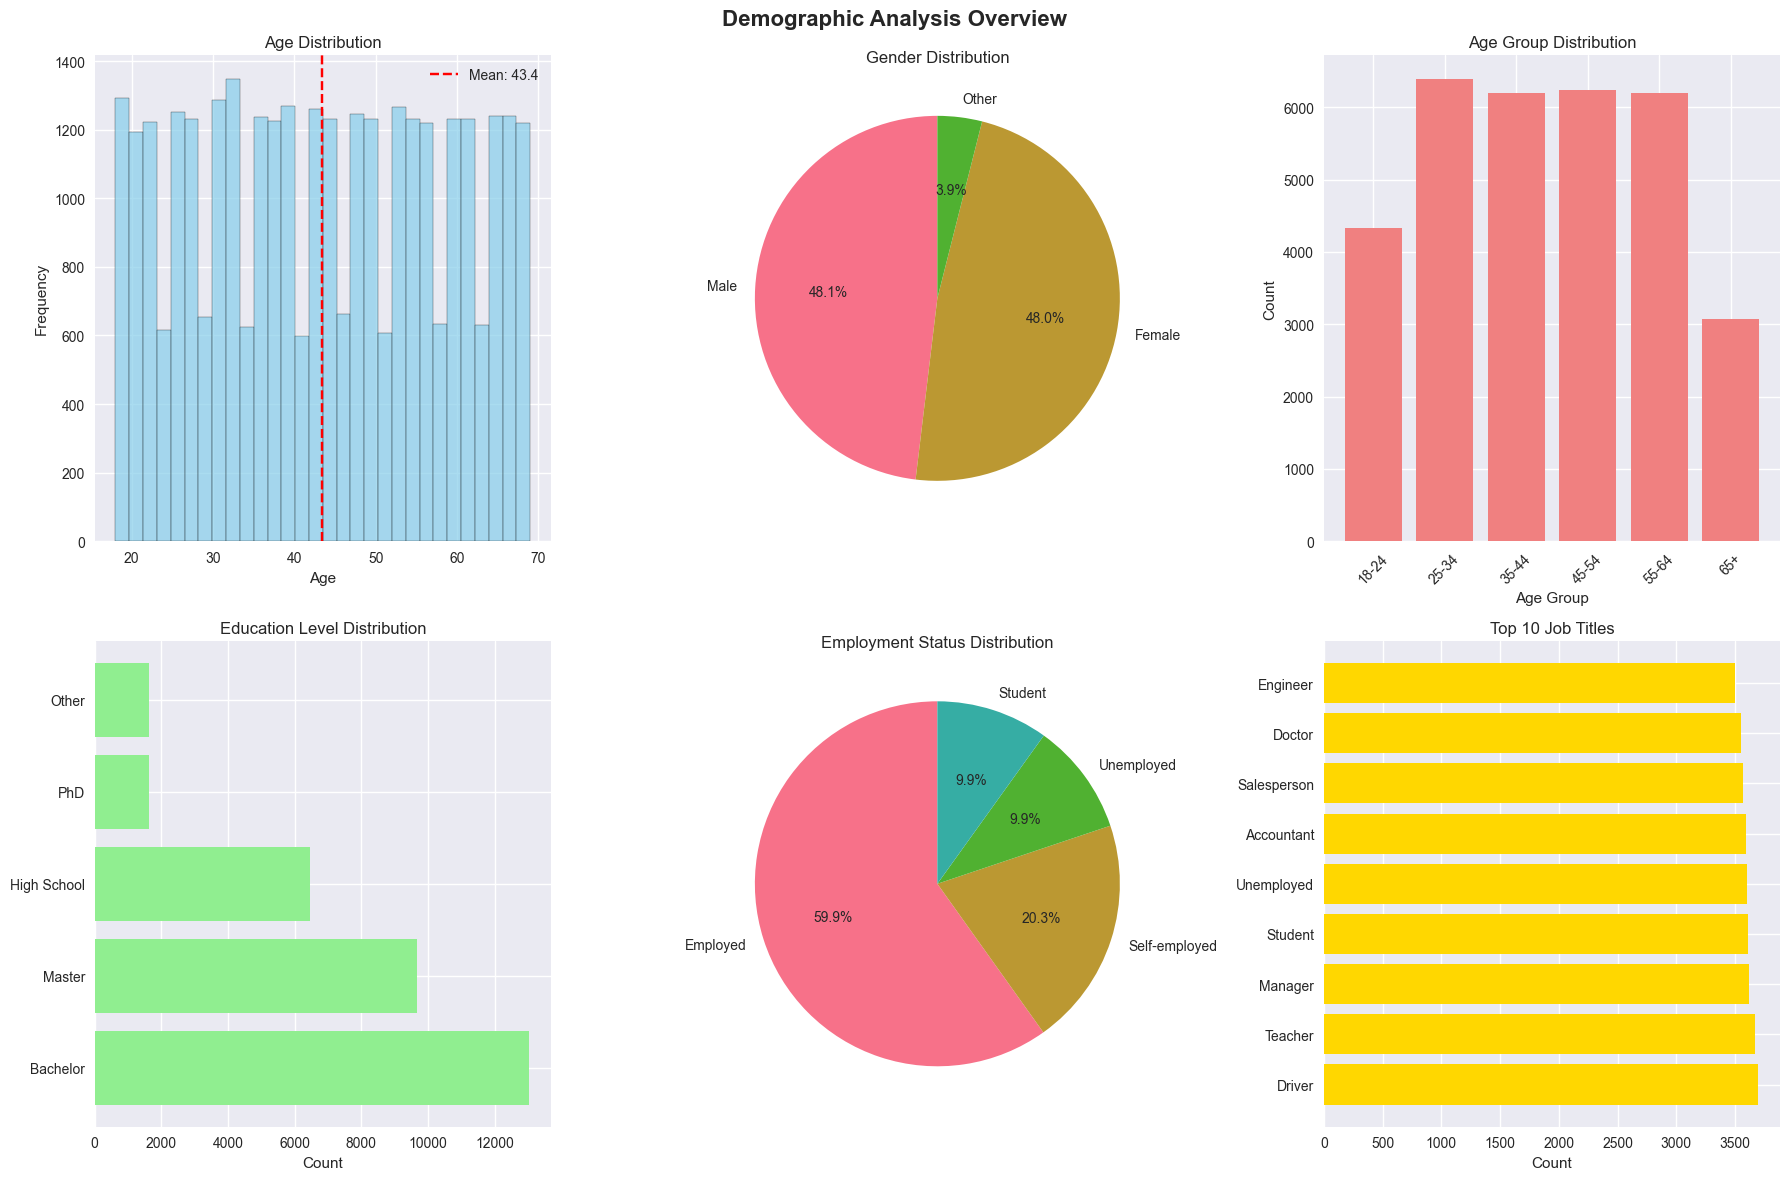

DEMOGRAPHIC INSIGHTS
Average Age: 43.4 years
Age Range: 18 - 69 years
Most Common Age Group: 25-34
Gender Distribution: {'Male': np.int64(15595), 'Female': np.int64(15550), 'Other': np.int64(1279)}
Most Common Education: Bachelor
Employment Rate: 59.9%


In [6]:
# Demographics Analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Demographic Analysis Overview', fontsize=16, fontweight='bold')

# Age Distribution
axes[0,0].hist(df_clean['age'], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')
axes[0,0].axvline(df_clean['age'].mean(), color='red', linestyle='--', label=f'Mean: {df_clean["age"].mean():.1f}')
axes[0,0].legend()

# Gender Distribution
gender_counts = df_clean['gender'].value_counts()
axes[0,1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Gender Distribution')

# Age Group Distribution
age_group_counts = df_clean['age_group'].value_counts().sort_index()
axes[0,2].bar(age_group_counts.index, age_group_counts.values, color='lightcoral')
axes[0,2].set_title('Age Group Distribution')
axes[0,2].set_xlabel('Age Group')
axes[0,2].set_ylabel('Count')
axes[0,2].tick_params(axis='x', rotation=45)

# Education Level Distribution
edu_counts = df_clean['education_level'].value_counts()
axes[1,0].barh(edu_counts.index, edu_counts.values, color='lightgreen')
axes[1,0].set_title('Education Level Distribution')
axes[1,0].set_xlabel('Count')

# Employment Status Distribution
emp_counts = df_clean['employment_status'].value_counts()
axes[1,1].pie(emp_counts.values, labels=emp_counts.index, autopct='%1.1f%%', startangle=90)
axes[1,1].set_title('Employment Status Distribution')

# Job Title Distribution (Top 10)
job_counts = df_clean['job_title'].value_counts().head(10)
axes[1,2].barh(job_counts.index, job_counts.values, color='gold')
axes[1,2].set_title('Top 10 Job Titles')
axes[1,2].set_xlabel('Count')

plt.tight_layout()
plt.show()

# Print demographic insights
print("DEMOGRAPHIC INSIGHTS")
print("="*50)
print(f"Average Age: {df_clean['age'].mean():.1f} years")
print(f"Age Range: {df_clean['age'].min()} - {df_clean['age'].max()} years")
print(f"Most Common Age Group: {df_clean['age_group'].mode().iloc[0]}")
print(f"Gender Distribution: {dict(df_clean['gender'].value_counts())}")
print(f"Most Common Education: {df_clean['education_level'].mode().iloc[0]}")
print(f"Employment Rate: {(df_clean['employment_status'] == 'Employed').mean()*100:.1f}%")

## 5. Income and Expense Analysis

Analyzing income patterns, expense behaviors, and the relationship between earnings and spending across different demographic segments.

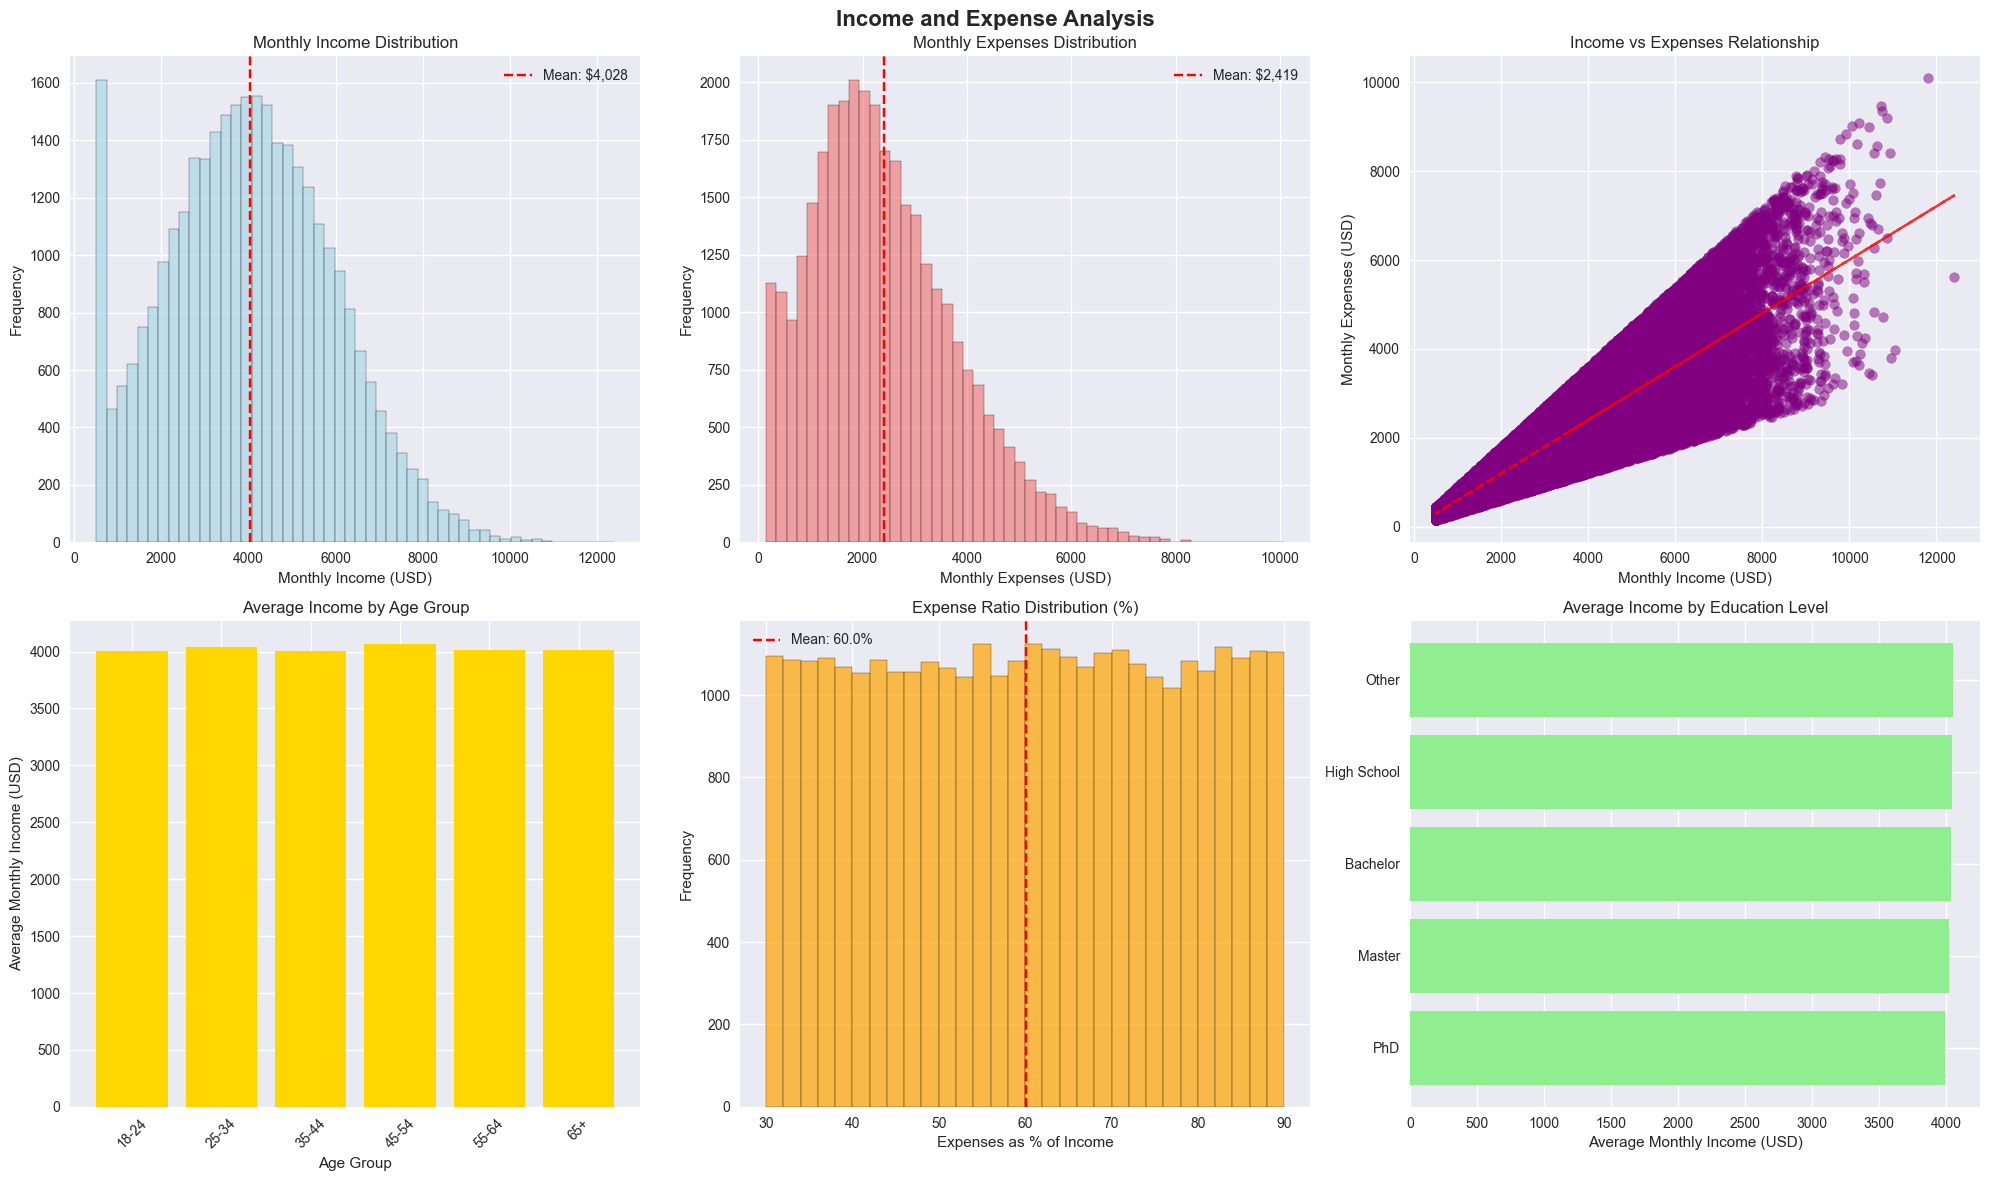

INCOME & EXPENSE INSIGHTS
Average Monthly Income: $4,027.86
Median Monthly Income: $3,997.74
Average Monthly Expenses: $2,419.44
Median Monthly Expenses: $2,219.57
Average Expense Ratio: 60.0%
Income-Expense Correlation: 0.829

Income Bracket Distribution:
income_bracket
High ($4K-$6K)      11089
Low (<$2K)           5093
Medium ($2K-$4K)    11132
Very High (>$6K)     5110
Name: count, dtype: int64


In [7]:
# Income and Expense Analysis
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Income and Expense Analysis', fontsize=16, fontweight='bold')

# Income Distribution
axes[0,0].hist(df_clean['monthly_income_usd'], bins=50, color='lightblue', alpha=0.7, edgecolor='black')
axes[0,0].set_title('Monthly Income Distribution')
axes[0,0].set_xlabel('Monthly Income (USD)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].axvline(df_clean['monthly_income_usd'].mean(), color='red', linestyle='--', 
                 label=f'Mean: ${df_clean["monthly_income_usd"].mean():,.0f}')
axes[0,0].legend()

# Expense Distribution
axes[0,1].hist(df_clean['monthly_expenses_usd'], bins=50, color='lightcoral', alpha=0.7, edgecolor='black')
axes[0,1].set_title('Monthly Expenses Distribution')
axes[0,1].set_xlabel('Monthly Expenses (USD)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].axvline(df_clean['monthly_expenses_usd'].mean(), color='red', linestyle='--', 
                 label=f'Mean: ${df_clean["monthly_expenses_usd"].mean():,.0f}')
axes[0,1].legend()

# Income vs Expenses Scatter Plot
axes[0,2].scatter(df_clean['monthly_income_usd'], df_clean['monthly_expenses_usd'], 
                 alpha=0.5, color='purple')
axes[0,2].set_title('Income vs Expenses Relationship')
axes[0,2].set_xlabel('Monthly Income (USD)')
axes[0,2].set_ylabel('Monthly Expenses (USD)')
# Add trend line
z = np.polyfit(df_clean['monthly_income_usd'], df_clean['monthly_expenses_usd'], 1)
p = np.poly1d(z)
axes[0,2].plot(df_clean['monthly_income_usd'], p(df_clean['monthly_income_usd']), "r--", alpha=0.8)

# Income by Age Group
income_by_age = df_clean.groupby('age_group')['monthly_income_usd'].mean().sort_index()
axes[1,0].bar(income_by_age.index, income_by_age.values, color='gold')
axes[1,0].set_title('Average Income by Age Group')
axes[1,0].set_xlabel('Age Group')
axes[1,0].set_ylabel('Average Monthly Income (USD)')
axes[1,0].tick_params(axis='x', rotation=45)

# Expense Ratio Distribution
axes[1,1].hist(df_clean['expense_ratio'], bins=30, color='orange', alpha=0.7, edgecolor='black')
axes[1,1].set_title('Expense Ratio Distribution (%)')
axes[1,1].set_xlabel('Expenses as % of Income')
axes[1,1].set_ylabel('Frequency')
axes[1,1].axvline(df_clean['expense_ratio'].mean(), color='red', linestyle='--', 
                 label=f'Mean: {df_clean["expense_ratio"].mean():.1f}%')
axes[1,1].legend()

# Income by Education Level
income_by_edu = df_clean.groupby('education_level')['monthly_income_usd'].mean().sort_values(ascending=True)
axes[1,2].barh(income_by_edu.index, income_by_edu.values, color='lightgreen')
axes[1,2].set_title('Average Income by Education Level')
axes[1,2].set_xlabel('Average Monthly Income (USD)')

plt.tight_layout()
plt.show()

# Print income and expense insights
print("INCOME & EXPENSE INSIGHTS")
print("="*50)
print(f"Average Monthly Income: ${df_clean['monthly_income_usd'].mean():,.2f}")
print(f"Median Monthly Income: ${df_clean['monthly_income_usd'].median():,.2f}")
print(f"Average Monthly Expenses: ${df_clean['monthly_expenses_usd'].mean():,.2f}")
print(f"Median Monthly Expenses: ${df_clean['monthly_expenses_usd'].median():,.2f}")
print(f"Average Expense Ratio: {df_clean['expense_ratio'].mean():.1f}%")
print(f"Income-Expense Correlation: {df_clean['monthly_income_usd'].corr(df_clean['monthly_expenses_usd']):.3f}")

# Income bracket analysis
print(f"\nIncome Bracket Distribution:")
print(df_clean['income_bracket'].value_counts().sort_index())

## 6. Loan and Debt Analysis

Examining loan patterns, debt behaviors, and their impact on financial health across different user segments.

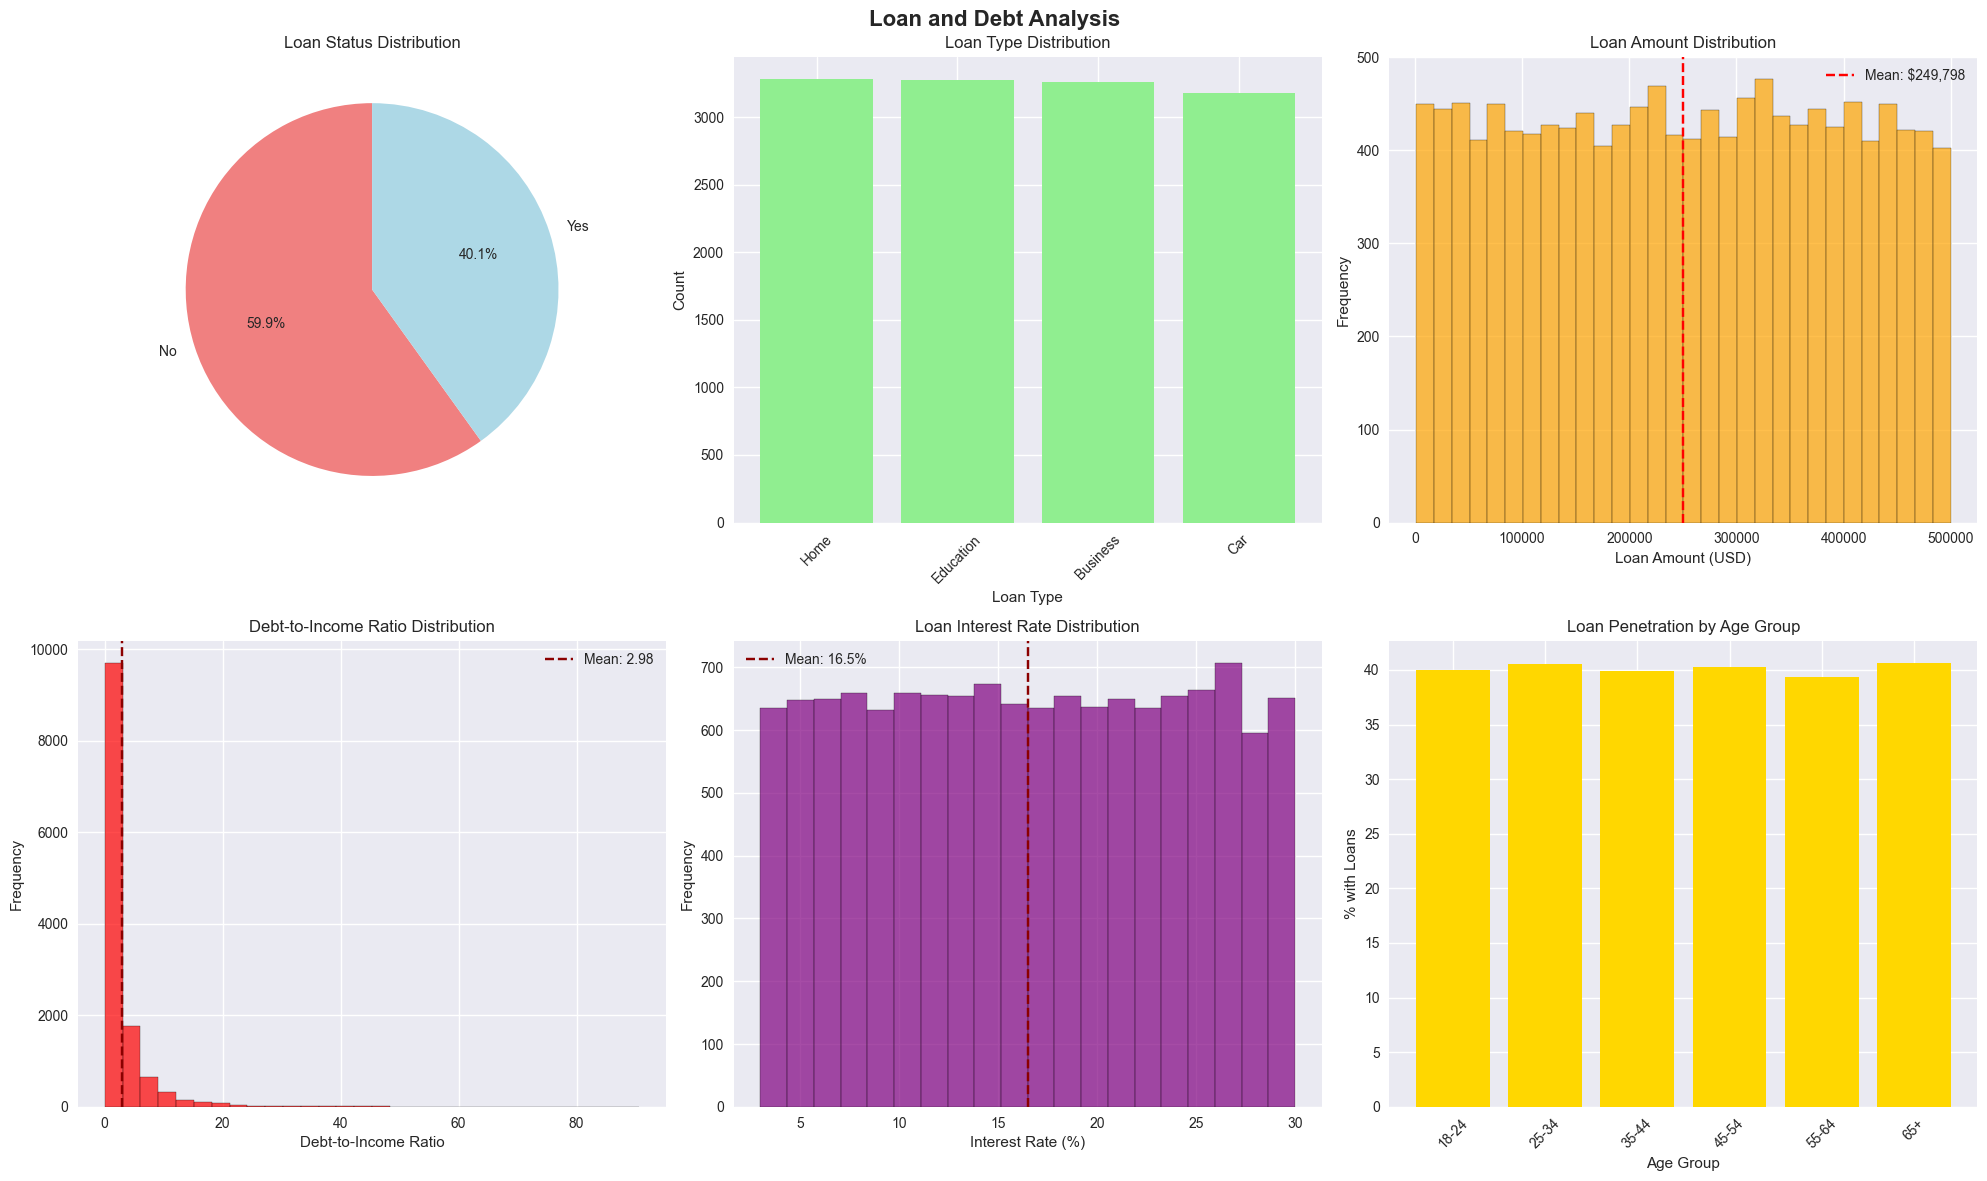

LOAN & DEBT INSIGHTS
Overall Loan Penetration: 40.1%
Average Loan Amount: $249,797.63
Median Loan Amount: $250,266.49
Average Loan Term: 146.0 months
Average Interest Rate: 16.5%
Average Monthly EMI: $7,717.37
Average Debt-to-Income Ratio: 2.98

Loan Type Breakdown:
loan_type
Home         3284
Education    3275
Business     3261
Car          3175
Name: count, dtype: int64


: 

In [ ]:
# Loan and Debt Analysis
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Loan and Debt Analysis', fontsize=16, fontweight='bold')

# Loan Status Distribution
loan_counts = df_clean['has_loan'].value_counts()
axes[0,0].pie(loan_counts.values, labels=loan_counts.index, autopct='%1.1f%%', 
             colors=['lightcoral', 'lightblue'], startangle=90)
axes[0,0].set_title('Loan Status Distribution')

# Loan Type Distribution (for those with loans)
loan_data = df_clean[df_clean['has_loan'] == 'Yes']
if not loan_data.empty:
    loan_type_counts = loan_data['loan_type'].value_counts()
    axes[0,1].bar(loan_type_counts.index, loan_type_counts.values, color='lightgreen')
    axes[0,1].set_title('Loan Type Distribution')
    axes[0,1].set_xlabel('Loan Type')
    axes[0,1].set_ylabel('Count')
    axes[0,1].tick_params(axis='x', rotation=45)

# Loan Amount Distribution
if not loan_data.empty:
    axes[0,2].hist(loan_data['loan_amount_usd'], bins=30, color='orange', alpha=0.7, edgecolor='black')
    axes[0,2].set_title('Loan Amount Distribution')
    axes[0,2].set_xlabel('Loan Amount (USD)')
    axes[0,2].set_ylabel('Frequency')
    axes[0,2].axvline(loan_data['loan_amount_usd'].mean(), color='red', linestyle='--', 
                     label=f'Mean: ${loan_data["loan_amount_usd"].mean():,.0f}')
    axes[0,2].legend()

# Debt-to-Income Ratio Distribution
debt_data = df_clean[df_clean['debt_to_income_ratio'] > 0]
if not debt_data.empty:
    axes[1,0].hist(debt_data['debt_to_income_ratio'], bins=30, color='red', alpha=0.7, edgecolor='black')
    axes[1,0].set_title('Debt-to-Income Ratio Distribution')
    axes[1,0].set_xlabel('Debt-to-Income Ratio')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].axvline(debt_data['debt_to_income_ratio'].mean(), color='darkred', linestyle='--', 
                     label=f'Mean: {debt_data["debt_to_income_ratio"].mean():.2f}')
    axes[1,0].legend()

# Loan Interest Rate Distribution
if not loan_data.empty:
    axes[1,1].hist(loan_data['loan_interest_rate_pct'], bins=20, color='purple', alpha=0.7, edgecolor='black')
    axes[1,1].set_title('Loan Interest Rate Distribution')
    axes[1,1].set_xlabel('Interest Rate (%)')
    axes[1,1].set_ylabel('Frequency')
    axes[1,1].axvline(loan_data['loan_interest_rate_pct'].mean(), color='darkred', linestyle='--', 
                     label=f'Mean: {loan_data["loan_interest_rate_pct"].mean():.1f}%')
    axes[1,1].legend()

# Loan Status by Age Group
loan_by_age = df_clean.groupby('age_group')['has_loan_binary'].mean() * 100
axes[1,2].bar(loan_by_age.index, loan_by_age.values, color='gold')
axes[1,2].set_title('Loan Penetration by Age Group')
axes[1,2].set_xlabel('Age Group')
axes[1,2].set_ylabel('% with Loans')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print loan insights
print("LOAN & DEBT INSIGHTS")
print("="*50)
loan_rate = (df_clean['has_loan'] == 'Yes').mean() * 100
print(f"Overall Loan Penetration: {loan_rate:.1f}%")

if not loan_data.empty:
    print(f"Average Loan Amount: ${loan_data['loan_amount_usd'].mean():,.2f}")
    print(f"Median Loan Amount: ${loan_data['loan_amount_usd'].median():,.2f}")
    print(f"Average Loan Term: {loan_data['loan_term_months'].mean():.1f} months")
    print(f"Average Interest Rate: {loan_data['loan_interest_rate_pct'].mean():.1f}%")
    print(f"Average Monthly EMI: ${loan_data['monthly_emi_usd'].mean():,.2f}")

if not debt_data.empty:
    print(f"Average Debt-to-Income Ratio: {debt_data['debt_to_income_ratio'].mean():.2f}")

# Loan type breakdown
if not loan_data.empty:
    print(f"\nLoan Type Breakdown:")
    print(loan_data['loan_type'].value_counts())

## 7. Credit Score Analysis

Analyzing credit score distributions and their relationships with various financial and demographic factors.

In [ ]:
# Credit Score Analysis
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Credit Score Analysis', fontsize=16, fontweight='bold')

# Credit Score Distribution
axes[0,0].hist(df_clean['credit_score'], bins=30, color='lightblue', alpha=0.7, edgecolor='black')
axes[0,0].set_title('Credit Score Distribution')
axes[0,0].set_xlabel('Credit Score')
axes[0,0].set_ylabel('Frequency')
axes[0,0].axvline(df_clean['credit_score'].mean(), color='red', linestyle='--', 
                 label=f'Mean: {df_clean["credit_score"].mean():.0f}')
axes[0,0].legend()

# Credit Score by Age Group
credit_by_age = df_clean.groupby('age_group')['credit_score'].mean().sort_index()
axes[0,1].bar(credit_by_age.index, credit_by_age.values, color='lightgreen')
axes[0,1].set_title('Average Credit Score by Age Group')
axes[0,1].set_xlabel('Age Group')
axes[0,1].set_ylabel('Average Credit Score')
axes[0,1].tick_params(axis='x', rotation=45)

# Credit Score vs Income
axes[0,2].scatter(df_clean['monthly_income_usd'], df_clean['credit_score'], alpha=0.5, color='purple')
axes[0,2].set_title('Credit Score vs Monthly Income')
axes[0,2].set_xlabel('Monthly Income (USD)')
axes[0,2].set_ylabel('Credit Score')
# Add trend line
z = np.polyfit(df_clean['monthly_income_usd'], df_clean['credit_score'], 1)
p = np.poly1d(z)
axes[0,2].plot(df_clean['monthly_income_usd'], p(df_clean['monthly_income_usd']), "r--", alpha=0.8)

# Credit Score by Education Level
credit_by_edu = df_clean.groupby('education_level')['credit_score'].mean().sort_values(ascending=True)
axes[1,0].barh(credit_by_edu.index, credit_by_edu.values, color='orange')
axes[1,0].set_title('Average Credit Score by Education')
axes[1,0].set_xlabel('Average Credit Score')

# Credit Score by Loan Status
credit_by_loan = df_clean.groupby('has_loan')['credit_score'].mean()
axes[1,1].bar(credit_by_loan.index, credit_by_loan.values, color=['lightcoral', 'lightblue'])
axes[1,1].set_title('Average Credit Score by Loan Status')
axes[1,1].set_xlabel('Has Loan')
axes[1,1].set_ylabel('Average Credit Score')

# Credit Score Categories
def categorize_credit_score(score):
    if score < 300:
        return 'Very Poor'
    elif score < 500:
        return 'Poor'
    elif score < 650:
        return 'Fair'
    elif score < 750:
        return 'Good'
    else:
        return 'Excellent'

df_clean['credit_category'] = df_clean['credit_score'].apply(categorize_credit_score)
credit_cat_counts = df_clean['credit_category'].value_counts()
axes[1,2].pie(credit_cat_counts.values, labels=credit_cat_counts.index, autopct='%1.1f%%', startangle=90)
axes[1,2].set_title('Credit Score Categories')

plt.tight_layout()
plt.show()

# Print credit score insights
print("CREDIT SCORE INSIGHTS")
print("="*50)
print(f"Average Credit Score: {df_clean['credit_score'].mean():.0f}")
print(f"Median Credit Score: {df_clean['credit_score'].median():.0f}")
print(f"Credit Score Range: {df_clean['credit_score'].min()} - {df_clean['credit_score'].max()}")
print(f"Standard Deviation: {df_clean['credit_score'].std():.1f}")

# Correlation with income
income_credit_corr = df_clean['monthly_income_usd'].corr(df_clean['credit_score'])
print(f"Correlation with Income: {income_credit_corr:.3f}")

# Correlation with savings
savings_credit_corr = df_clean['savings_usd'].corr(df_clean['credit_score'])
print(f"Correlation with Savings: {savings_credit_corr:.3f}")

print(f"\nCredit Score Categories:")
print(df_clean['credit_category'].value_counts())

## 8. Regional Analysis

Comparing financial patterns, behaviors, and trends across different geographical regions.

In [ ]:
# Regional Analysis
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Regional Financial Analysis', fontsize=16, fontweight='bold')

# Regional Distribution
region_counts = df_clean['region'].value_counts()
axes[0,0].pie(region_counts.values, labels=region_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Regional Distribution')

# Average Income by Region
income_by_region = df_clean.groupby('region')['monthly_income_usd'].mean().sort_values(ascending=True)
axes[0,1].barh(income_by_region.index, income_by_region.values, color='lightblue')
axes[0,1].set_title('Average Monthly Income by Region')
axes[0,1].set_xlabel('Average Monthly Income (USD)')

# Average Savings by Region
savings_by_region = df_clean.groupby('region')['savings_usd'].mean().sort_values(ascending=True)
axes[0,2].barh(savings_by_region.index, savings_by_region.values, color='lightgreen')
axes[0,2].set_title('Average Savings by Region')
axes[0,2].set_xlabel('Average Savings (USD)')

# Credit Score by Region
credit_by_region = df_clean.groupby('region')['credit_score'].mean().sort_values(ascending=True)
axes[1,0].barh(credit_by_region.index, credit_by_region.values, color='orange')
axes[1,0].set_title('Average Credit Score by Region')
axes[1,0].set_xlabel('Average Credit Score')

# Loan Penetration by Region
loan_by_region = df_clean.groupby('region')['has_loan_binary'].mean() * 100
axes[1,1].bar(loan_by_region.index, loan_by_region.values, color='gold')
axes[1,1].set_title('Loan Penetration by Region (%)')
axes[1,1].set_xlabel('Region')
axes[1,1].set_ylabel('% with Loans')
axes[1,1].tick_params(axis='x', rotation=45)

# Savings-to-Income Ratio by Region
savings_ratio_by_region = df_clean.groupby('region')['savings_to_income_ratio'].mean().sort_values(ascending=True)
axes[1,2].barh(savings_ratio_by_region.index, savings_ratio_by_region.values, color='purple')
axes[1,2].set_title('Avg Savings-to-Income Ratio by Region')
axes[1,2].set_xlabel('Average Savings-to-Income Ratio')

plt.tight_layout()
plt.show()

# Regional Statistics Table
print("REGIONAL FINANCIAL COMPARISON")
print("="*80)
regional_stats = df_clean.groupby('region').agg({
    'monthly_income_usd': 'mean',
    'monthly_expenses_usd': 'mean',
    'savings_usd': 'mean',
    'credit_score': 'mean',
    'savings_to_income_ratio': 'mean',
    'has_loan_binary': 'mean',
    'age': 'mean'
}).round(2)

regional_stats.columns = ['Avg Income', 'Avg Expenses', 'Avg Savings', 'Avg Credit', 
                         'Savings Ratio', 'Loan Rate', 'Avg Age']
regional_stats['Loan Rate'] = regional_stats['Loan Rate'] * 100

print(regional_stats)

# Regional insights
print(f"\nREGIONAL INSIGHTS:")
print("="*50)
print(f"Highest Income Region: {income_by_region.index[-1]} (${income_by_region.iloc[-1]:,.2f})")
print(f"Lowest Income Region: {income_by_region.index[0]} (${income_by_region.iloc[0]:,.2f})")
print(f"Highest Savings Region: {savings_by_region.index[-1]} (${savings_by_region.iloc[-1]:,.2f})")
print(f"Highest Credit Score Region: {credit_by_region.index[-1]} ({credit_by_region.iloc[-1]:.0f})")
print(f"Highest Loan Penetration: {loan_by_region.index[loan_by_region.argmax()]} ({loan_by_region.max():.1f}%)")

## 9. Savings Patterns Analysis

Deep dive into savings behaviors, patterns, and factors that influence saving capacity across different demographics.

In [ ]:
# Savings Patterns Analysis
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Savings Patterns Analysis', fontsize=16, fontweight='bold')

# Savings Distribution
axes[0,0].hist(df_clean['savings_usd'], bins=50, color='lightblue', alpha=0.7, edgecolor='black')
axes[0,0].set_title('Savings Distribution')
axes[0,0].set_xlabel('Savings (USD)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].axvline(df_clean['savings_usd'].mean(), color='red', linestyle='--', 
                 label=f'Mean: ${df_clean["savings_usd"].mean():,.0f}')
axes[0,0].legend()

# Savings-to-Income Ratio Distribution
axes[0,1].hist(df_clean['savings_to_income_ratio'], bins=30, color='lightgreen', alpha=0.7, edgecolor='black')
axes[0,1].set_title('Savings-to-Income Ratio Distribution')
axes[0,1].set_xlabel('Savings-to-Income Ratio')
axes[0,1].set_ylabel('Frequency')
axes[0,1].axvline(df_clean['savings_to_income_ratio'].mean(), color='red', linestyle='--', 
                 label=f'Mean: {df_clean["savings_to_income_ratio"].mean():.1f}')
axes[0,1].legend()

# Savings by Age Group
savings_by_age = df_clean.groupby('age_group')['savings_usd'].mean().sort_index()
axes[0,2].bar(savings_by_age.index, savings_by_age.values, color='orange')
axes[0,2].set_title('Average Savings by Age Group')
axes[0,2].set_xlabel('Age Group')
axes[0,2].set_ylabel('Average Savings (USD)')
axes[0,2].tick_params(axis='x', rotation=45)

# Savings by Income Bracket
savings_by_income = df_clean.groupby('income_bracket')['savings_usd'].mean().sort_index()
axes[1,0].bar(savings_by_income.index, savings_by_income.values, color='purple')
axes[1,0].set_title('Average Savings by Income Bracket')
axes[1,0].set_xlabel('Income Bracket')
axes[1,0].set_ylabel('Average Savings (USD)')
axes[1,0].tick_params(axis='x', rotation=45)

# Savings vs Income Scatter
axes[1,1].scatter(df_clean['monthly_income_usd'], df_clean['savings_usd'], alpha=0.5, color='green')
axes[1,1].set_title('Savings vs Monthly Income')
axes[1,1].set_xlabel('Monthly Income (USD)')
axes[1,1].set_ylabel('Savings (USD)')
# Add trend line
z = np.polyfit(df_clean['monthly_income_usd'], df_clean['savings_usd'], 1)
p = np.poly1d(z)
axes[1,1].plot(df_clean['monthly_income_usd'], p(df_clean['monthly_income_usd']), "r--", alpha=0.8)

# Savings Category Distribution
savings_cat_counts = df_clean['savings_category'].value_counts()
axes[1,2].pie(savings_cat_counts.values, labels=savings_cat_counts.index, autopct='%1.1f%%', startangle=90)
axes[1,2].set_title('Savings Categories Distribution')

plt.tight_layout()
plt.show()

# Savings insights
print("SAVINGS PATTERNS INSIGHTS")
print("="*50)
print(f"Average Savings: ${df_clean['savings_usd'].mean():,.2f}")
print(f"Median Savings: ${df_clean['savings_usd'].median():,.2f}")
print(f"Average Savings-to-Income Ratio: {df_clean['savings_to_income_ratio'].mean():.2f}")
print(f"Median Savings-to-Income Ratio: {df_clean['savings_to_income_ratio'].median():.2f}")

# Correlation with income
savings_income_corr = df_clean['monthly_income_usd'].corr(df_clean['savings_usd'])
print(f"Savings-Income Correlation: {savings_income_corr:.3f}")

# Savings by employment status
print(f"\nSavings by Employment Status:")
savings_by_employment = df_clean.groupby('employment_status')['savings_usd'].mean().sort_values(ascending=False)
for emp, savings in savings_by_employment.items():
    print(f"  {emp}: ${savings:,.2f}")

# High savers analysis (top 10%)
high_savers_threshold = df_clean['savings_usd'].quantile(0.9)
high_savers = df_clean[df_clean['savings_usd'] >= high_savers_threshold]
print(f"\nHigh Savers Analysis (Top 10%, >${high_savers_threshold:,.0f}):")
print(f"  Count: {len(high_savers):,} ({len(high_savers)/len(df_clean)*100:.1f}%)")
print(f"  Average Age: {high_savers['age'].mean():.1f}")
print(f"  Average Income: ${high_savers['monthly_income_usd'].mean():,.2f}")
print(f"  Most Common Education: {high_savers['education_level'].mode().iloc[0]}")
print(f"  Loan Rate: {(high_savers['has_loan'] == 'Yes').mean()*100:.1f}%")

## 10. Statistical Correlations

Examining relationships between different financial metrics through correlation analysis and statistical tests.